In [2]:
import quantstats as qs

qs.extend_pandas()

[*********************100%%**********************]  1 of 1 completed


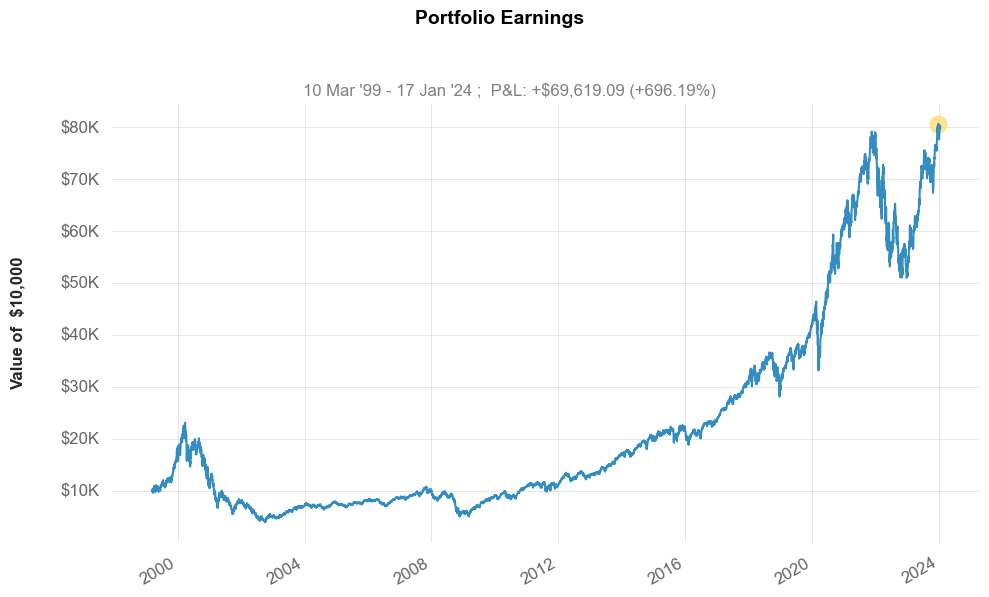

In [7]:
stock = qs.utils.download_returns("QQQ")

stock.plot_earnings(savefig="qqq_earning.png", start_balance=10_000)

In [10]:
# qs.reports.html(stock, title="My investements", output="qqq_o.html")

qs.reports.html(stock, "SPY", title="QQQ vs SPY", output="qqq_vs_spy.html")

[*********************100%%**********************]  1 of 1 completed
/Users/tdafonseca/Desktop/6-Github/learning/portfolio-optimization/.venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tdafonseca/Desktop/6-Github/learning/portfolio-optimization/.venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tdafonseca/Desktop/6-Github/learning/portfolio-optimization/.venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarn

In [ ]:
stock = qs.utils.download_returns("QQQ")

qs.reports.html(stock, "SPY", title="QQQ vs SPY", output="qqq_vs_spy.html")

Date
1999-03-10         NaN
1999-03-11    0.004896
1999-03-12   -0.024361
1999-03-15    0.028714
1999-03-16    0.008495
                ...   
2024-01-10    0.006778
2024-01-11    0.002081
2024-01-12    0.000513
2024-01-16   -0.000098
2024-01-17   -0.007240
Name: Close, Length: 6255, dtype: float64